# GP Regression Demo
This demonstration covers the basics of a supervised learning problem with gptorch:
* Defining a model
* Training the model
* Predicting with the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from gptorch.models.gpr import GPR
from gptorch.models.sparse_gpr import VFE
from gptorch import kernels
from gptorch.util import TensorType
from gptorch import kernels
from gptorch import mean_functions

np.random.seed(42)
torch.manual_seed(42)

## Ground truth and training data
We'll try to model a simple one-dimensional sinusoid.

In [2]:
def f(x):
    return np.sin(2. * np.pi * x) + np.cos(3.5 * np.pi * x) - 3.0 * x + 5.0

In [3]:
n = 24
x = np.random.rand(n, 1)
y = f(x) + 0.1 * np.random.randn(n, 1)

## Model definition
Here, we define the GP model.
The API is the same for exact or sparse GPs.

The main components of a GP model are:
* The mean function
* The kernel
* The likelihood

In [4]:
# Kernel

# kern = kernels.Rbf(1)
kern = kernels.Matern52(1)
# kern = kernels.Linear(1) + kernels.Rbf(1)

### Mean functions
Thanks to PyTorch, we can use anything that we'd like as a mean function that's a `torch.nn.Module`--anything from a linear mean function to a full-blown neural network!

In [5]:
# mean_function = None

# A traditional, simple parametric mean function:
# mean_function = mean_functions.Constant(1)
mean_function = torch.nn.Linear(1, 1)


# Something more exotic
# mean_function = torch.nn.Sequential(
#     torch.nn.Linear(1, 64),
#     torch.nn.ReLU(),
#     torch.nn.Linear(64, 64),
#     torch.nn.ReLU(),
#     torch.nn.Linear(64, 1)
# )

In [6]:
# (Likelihood defaults to Gaussian)

In [7]:
# Try different models:
model = GPR(x, y, kern, mean_function=mean_function)
# model = VFE(x, y, kern)

## Train the model

In [8]:
# Train
model.optimize(method="L-BFGS-B", max_iter=100)
print("Trained model:")
print(model)

Scipy.optimize.minimize...
loss: [45.00190563]
loss: [32.77648622]
loss: [24.91641509]
loss: [23.73088631]
loss: [13.21587464]
loss: [74.88889866]
loss: [11.09592274]
loss: [7.93797859]
loss: [312.46579925]
loss: [3.60504148]
loss: [3.56726358]
loss: [2.94165438]
loss: [2.82414602]
loss: [2.62996434]
loss: [1.91571414]
loss: [5485.54650933]
loss: [0.84931074]
loss: [0.87673151]
loss: [12.04747419]
loss: [0.39391991]
loss: [-0.09526269]
loss: [-0.65677485]
loss: [-0.96889031]
loss: [-1.07464154]
loss: [-1.26406287]
loss: [-1.64430403]
loss: [-1.72861503]
loss: [-1.77036923]
loss: [-1.77784512]
loss: [-1.81287014]
loss: [-1.92217127]
loss: [-2.08635504]
loss: [-2.13871167]
loss: [-2.24876817]
loss: [-2.04287207]
loss: [-2.39431817]
loss: [-1.9756327]
loss: [-2.45835677]
loss: [-2.4519167]
loss: [-2.49776238]
loss: [-2.50001538]
loss: [-2.5002075]
loss: [-2.50021118]
loss: [-2.50021122]
loss: [-2.50021128]
Trained model:
gpr (
  (kernel): Matern52 (
  variance
  tensor([1.0765])
  length_

## Predict

In [9]:
# Predict
n_test = 200
n_samples = 5
x_test = np.linspace(-0.5, 1.5, n_test).reshape((-1, 1))

mu, s = model.predict_y(x_test)
mu, s = mu.data.numpy().flatten(), s.data.numpy().flatten()
y_samp = model.predict_y_samples(x_test, n_samples=n_samples).data.numpy()
unc = 2.0 * np.sqrt(s)

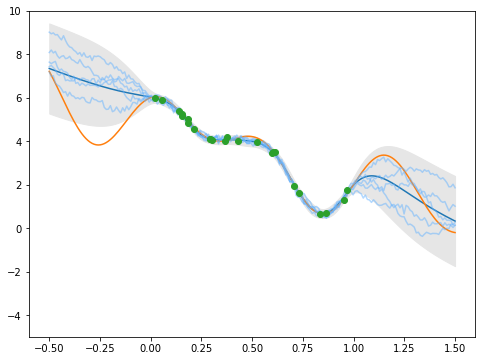

In [10]:
# Show prediction
x_test = x_test.flatten()
plt.figure(figsize=(8, 6))
plt.fill_between(x_test, mu - unc, mu + unc, color=(0.9,) * 3)
plt.plot(x_test, mu)
plt.plot(x_test, f(x_test))
for y_samp_i in y_samp:
    plt.plot(x_test, y_samp_i, color=(0.4, 0.7, 1.0), alpha=0.5)
plt.plot(x, y, 'o')
plt.ylim(-5, 10)
plt.show()